<a href="https://www.kaggle.com/code/mitzbek/decision-tree-random-forest-xgboost-classifiers?scriptVersionId=139126160" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Decision Tree, Random Forest and XGBoost Classifier Models**

**Description**

hi, I am ümit, I have been working on data visualization for a long time. I am on the way to learn in the Data Science and Machine Learning,in this my first kaggle notebook,I'll review and visualization the dataset and apply DecisionTree,Randomforest,XGBoost Classifications models.

**Content**

[> Data Review](http://)

[> Data Visualization](http://)

[> Classifications Models](http://)

[>    Data Preparing](http://)

[>    Decision Tree Classifier](http://)

[>    Random Forest Classifier](http://)

[>    XGBoost](http://)



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/drug200csv/drug200.csv


**Data Review**

In [2]:
# I read the dataset
data = pd.read_csv('/kaggle/input/drug200csv/drug200.csv')

In [3]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
# Values(Max, min, std)
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
import warnings
warnings.filterwarnings('ignore')
# Relationship between columns
data.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


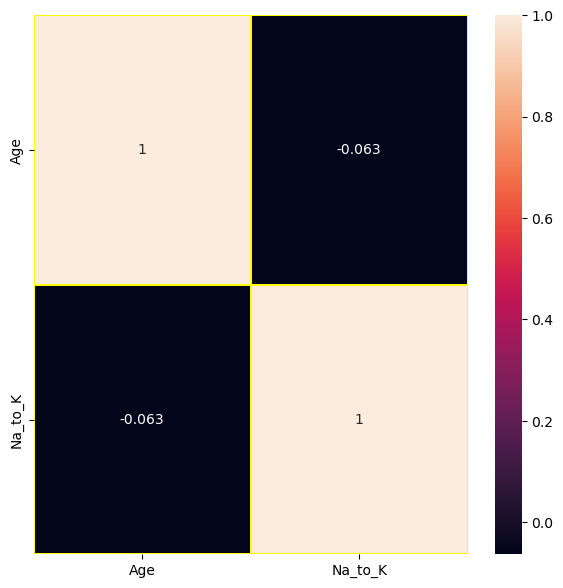

In [7]:
# Visualization of correlation result with heatmap
fig,axes = plt.subplots(figsize=(7,7))
sns.heatmap(data.corr(),annot =True,linecolor='yellow'
            ,linewidths=0.3,ax = axes)
plt.show()

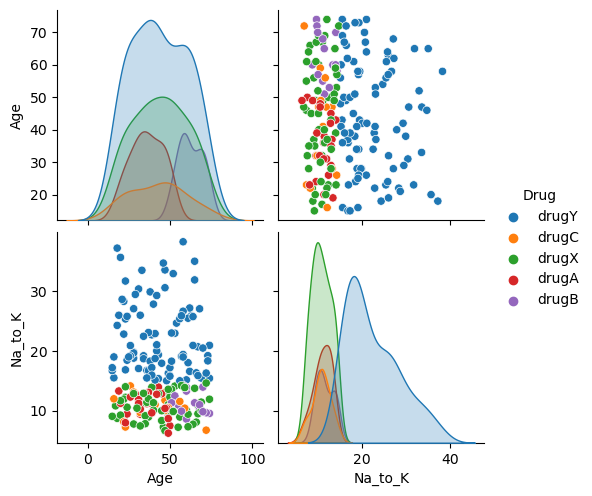

In [8]:
# Visualization of correlation result with pairplot
sns.pairplot(data,hue='Drug')

In [9]:
# I am looking the data in the columns
# Value counts
print(data['Age'].value_counts(dropna=False))
print(data['BP'].value_counts())
print(data['Sex'].value_counts())
print(data['Cholesterol'].value_counts())
print(data['Drug'].value_counts())

47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: Age, dtype: int64
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64
M    104
F     96
Name: Sex, dtype: int64
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


**Data Visualization**

I visualized the dataset with plotly and matplotlib

In [10]:
# the number of age
dataage = data['Age'].value_counts(dropna=False)
npdataage= np.array(dataage)
x = list(npdataage)
y= data.Age.value_counts().index

DataAge = { 'Age' : y, 'number' :x}
DataAge = pd.DataFrame(DataAge)

fig = px.bar(DataAge, x = 'Age', y= 'number')
fig.show()

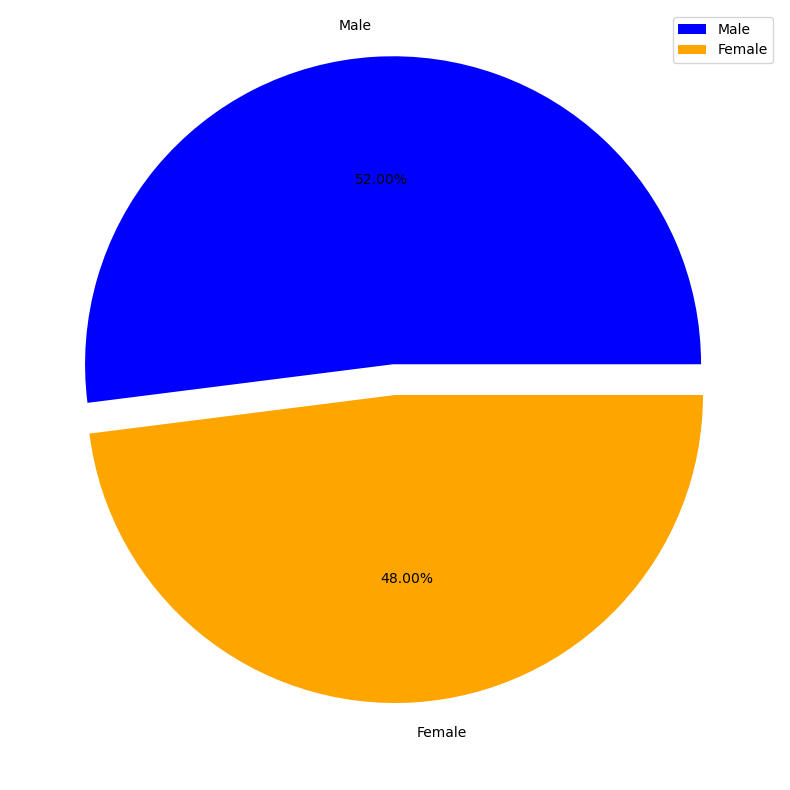

In [11]:
# I applied to visualized matplotlib the number of Sex in the dataset 
plt.figure(figsize=(10,10))
x = round(data['Sex'].value_counts() / data.shape[0]*100,2)
plt.pie(x,labels=['Male','Female'],explode=[0.1,0],
       autopct='%.2f%%',colors=['blue','orange'])
plt.legend()
plt.show()

In [12]:
# Blood Pressure with plotly visualizing
dataBP = data['BP'].value_counts(dropna= False)
npdataBP = np.array(dataBP)
x =list(npdataBP)
y = data.BP.value_counts().index

databp= {'BP': y, 'number': x}
DataBP = pd.DataFrame(databp)

fig =px.bar(DataBP, x = 'BP', y= 'number')
fig.show()

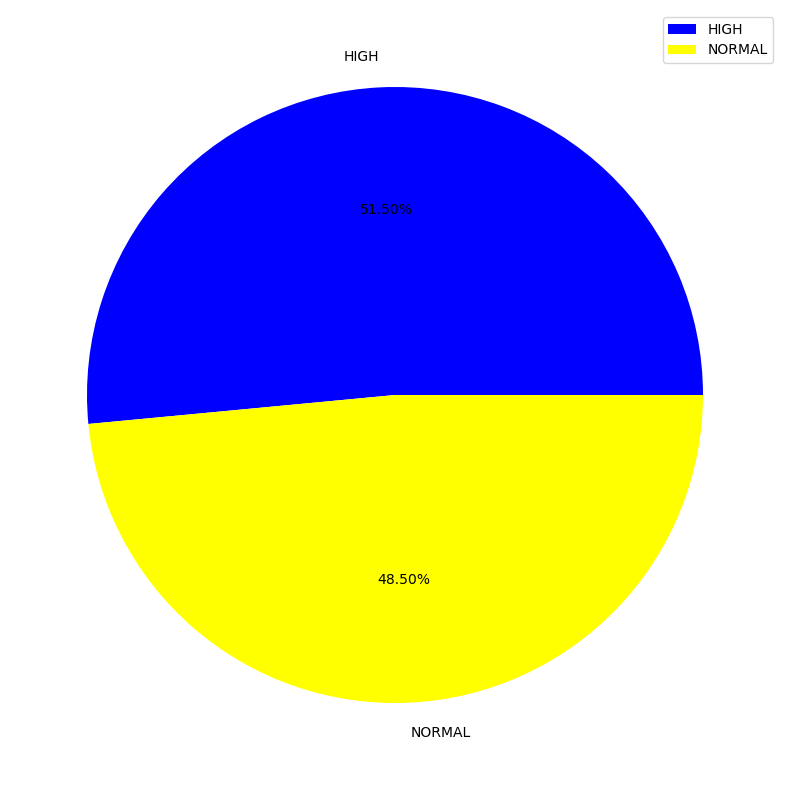

In [13]:
# Cholesterol with matplotlib visualizing
plt.figure(figsize=(10,10))
dataco = data["Cholesterol"].value_counts(dropna=False)
dataconp = np.array(dataco)
x = list(dataconp)

labels = data.Cholesterol.value_counts().index
sizes = x
explode = [0,0] 
colors= ['blue','yellow']

plt.pie(sizes,labels=labels,explode=explode,
       colors=colors,autopct='%.2f%%')
plt.legend()
plt.show()

<Axes: xlabel='Drug', ylabel='count'>

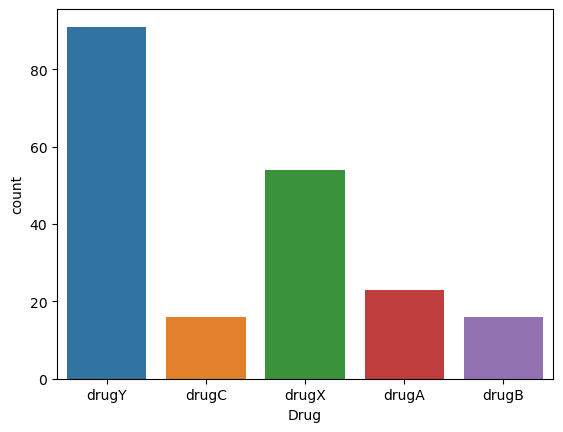

In [14]:
# the number of Drug visualized with seaborn and value counts
data['Drug'].value_counts()
sns.countplot( x = 'Drug',data=data)

In [15]:
# the relationship between age and Na_To_K with plotly visualizing
fig=px.scatter(data, x = 'Na_to_K', y ='Age',color='Drug',
              size='Age',hover_data=['Na_to_K'])
fig.show()

**Classifications Models**

*I will prepare the dataset for training

*Converting dataset the necessary ones

*train-test splitting


**Data Preparing**

In [16]:
# Changing type 
data.Sex = [1 if i == 'F' else 0 for i in data.Sex]

In [17]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,HIGH,HIGH,25.355,drugY
1,47,0,LOW,HIGH,13.093,drugC
2,47,0,LOW,HIGH,10.114,drugC
3,28,1,NORMAL,HIGH,7.798,drugX
4,61,1,LOW,HIGH,18.043,drugY


In [18]:
# Changed Blood Pressure type

import warnings
warnings.filterwarnings('ignore')

for i in range(0,len(data.BP)):
    if data.BP[i] == "LOW":
        data.BP[i] = 2
        
    elif data.BP[i] == "NORMAL":
        data.BP[i] = 1
        
    else:
        data.BP[i] = 0

In [19]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,HIGH,25.355,drugY
1,47,0,2,HIGH,13.093,drugC
2,47,0,2,HIGH,10.114,drugC
3,28,1,1,HIGH,7.798,drugX
4,61,1,2,HIGH,18.043,drugY


In [20]:
# Changed Cholesterol type
data.Cholesterol= [1 if i == 'HIGH' else 0 for i in data.Cholesterol]

In [21]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,1,25.355,drugY
1,47,0,2,1,13.093,drugC
2,47,0,2,1,10.114,drugC
3,28,1,1,1,7.798,drugX
4,61,1,2,1,18.043,drugY


In [22]:
# Changed Drug type
import warnings
warnings.filterwarnings('ignore')

for i in range(0,len(data)):
    if data.Drug[i] == "DrugY":
        data.Drug[i] = 4
    elif data.Drug[i] == "drugX":
        data.Drug[i] = 3
    elif data.Drug[i] == "drugA":
        data.Drug[i] = 2
    elif data.Drug[i] == "drugC":
        data.Drug[i] = 1
    else:
        data.Drug[i] = 0

In [23]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,1,25.355,0
1,47,0,2,1,13.093,1
2,47,0,2,1,10.114,1
3,28,1,1,1,7.798,3
4,61,1,2,1,18.043,0


In [24]:
data.dtypes

Age              int64
Sex              int64
BP              object
Cholesterol      int64
Na_to_K        float64
Drug            object
dtype: object

In [25]:
# I changed the Drug and blood pressure types to integer
data['Drug']= data['Drug'].astype(int)

In [26]:
data['BP']= data['BP'].astype(int)

In [27]:
data.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
Drug             int64
dtype: object

In [28]:
X = data.drop(['Drug'],axis= 1)
y = data.Drug.values

In [29]:
# splitted the data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.30,
                                                 random_state=1)

**Decision Tree Classifie**r

I applied Decision Tree Classifier model with gini criterion for the dataset

In [31]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [32]:
predict = dtc.predict(X_test)

In [33]:
score = accuracy_score(predict,y_test)
score

0.9

In [34]:
y_pred_train= dtc.predict(X_train)
y_pred_train

array([3, 3, 2, 0, 2, 3, 3, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0,
       3, 0, 2, 0, 3, 3, 2, 3, 0, 2, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3,
       3, 0, 0, 2, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 2, 0, 0, 0, 2, 3, 0, 0,
       0, 3, 0, 3, 3, 2, 3, 2, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 3, 0, 3, 2, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 2, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 2, 3, 3, 2, 0, 0, 0, 0, 0, 3,
       2, 0, 3, 0, 2, 3, 2, 3])

In [35]:
print('Training accuracy score:{0:0.2f}'. format(accuracy_score(y_train,
                                                                y_pred_train)))

Training accuracy score:0.91


In [36]:
print('Training  score: {:.2f}'.format(dtc.score(X_train, y_train)))
print('Test score: {:.2f}'.format(dtc.score(X_test, y_test)))

Training  score: 0.91
Test score: 0.90


**Random Forest Classifier**

I applied Random Forest Classifier model for the dataset

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(X_train, y_train)
predict = rfc.predict(X_test)

In [39]:
print('The accuracy score of the Random Forest is',accuracy_score(predict,y_test))

The accuracy score of the Random Forest is 0.95


In [40]:
params={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,500],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [41]:
import warnings
warnings.filterwarnings('ignore')
grid = GridSearchCV(rfc,param_grid=params,cv=5,verbose=2,
                    n_jobs=-1,scoring='accuracy')
model_grid= grid.fit(X_train,y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=500; total time=   0.0s
[CV] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_spli

In [42]:
print('Best hyperparameters are: '+str(model_grid.best_params_))

Best hyperparameters are: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [43]:
# I have tried the model with best parameters again
rfc1 = RandomForestClassifier(n_estimators=100,
                              max_features=3,
                              min_samples_leaf=1,
                              min_samples_split=2,
                              random_state = 0)

In [44]:
rfc1.fit(X_train, y_train)
predict1 = rfc1.predict(X_test)

In [45]:
print('The accuracy score of the Random Forest is',accuracy_score(predict1,y_test))

The accuracy score of the Random Forest is 0.9666666666666667


In [46]:
print('Training set score: {:.4f}'.format(rfc1.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rfc1.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9667


**XGBoost**

I wanted to compare XGBoost and Random Forest Classifiers 


In [47]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [48]:
parameters = {
        'n_estimators': [100, 500],
        'subsample': [0.8, 1.0], 
        'gamma' : [0,1,5],
        'max_depth': [3, 4, 5], 
        'learning_rate': [0.1, 0.3]}
xgboost = XGBClassifier()
xgboost_cv = GridSearchCV(xgboost, parameters, cv = 3, n_jobs = -1, verbose = 2)
xgboost_cv.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total 

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 1, 5], 'learning_rate': [0.1, 0.3],
                         'max_depth': [3, 4, 5], 'n_estimators': [100, 500],
                         'subsample': [0.8, 1.0]},
             verbose=2)

In [49]:
best = xgboost_cv.best_params_
best

{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 1.0}

In [50]:
xgboost = XGBClassifier(best)
xgboost.fit(X_train,y_train)

      
      

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [51]:
print('test score is : ',xgboost.score(X_test,y_test))


test score is :  0.9666666666666667


**Outcome**

Thanks for reading my first kaggle notebook,I will be waiting comments and suggestions.

